In [278]:
import json #library for dealing with json data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [280]:
decoder = json.JSONDecoder()

[JSON](https://en.wikipedia.org/wiki/JSON) is a file format for storing attribute-value pairs. Let's start by looking at one line.

In [281]:
with open('ebola-tweets-short.json') as fin:
    line = fin.readline()
    print (line)
    tweet = decoder.decode(line)

{"created_at":"Thu Aug 28 15:34:30 +0000 2014","id":505015575811457024,"id_str":"505015575811457024","text":"Rebola, gatinha http:\/\/t.co\/xMxqJE5o3U","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":360002438,"id_str":"360002438","name":"jubas\u2661","screen_name":"luhantella","location":"\u266111.05.14.\u2661","url":"http:\/\/ask.fm\/httpshawol","description":"\u300c2ne1dsoshineexo\u300d are my drugs. + girl's day vixx bigbang orange caramel got7 suju bestie akmu. \u2665\ufe0e2Crazy \u2661 rua das HunHan \u00acu\u00ac\u2661 For eternity, Elli. \u2764\ufe0f Gabi \u2764\ufe0f","protected":false,"verified":false,"followers_count":802,"friends_count":1303,"listed_count":2,"favourites_count":1492,"statuses_count":44745,"created_at":"Mon

The JSON object itself is a dict of key-value pairs. 
- Values can themselves be key-value pairs, such as `tweet['user']`
- Empty values are written `[]`

In [282]:
print(tweet.keys())

dict_keys(['possibly_sensitive', 'created_at', 'lang', 'id_str', 'geo', 'retweeted', 'favorite_count', 'contributors', 'favorited', 'truncated', 'in_reply_to_status_id_str', 'timestamp_ms', 'in_reply_to_status_id', 'user', 'place', 'in_reply_to_screen_name', 'entities', 'filter_level', 'extended_entities', 'coordinates', 'retweet_count', 'id', 'text', 'source', 'in_reply_to_user_id_str', 'in_reply_to_user_id'])


`user` is a nested JSON object, which is itself a list of key-value pairs.

In [285]:
tweet['user']

{'contributors_enabled': False,
 'created_at': 'Mon Aug 22 14:46:00 +0000 2011',
 'default_profile': False,
 'default_profile_image': False,
 'description': "「2ne1dsoshineexo」 are my drugs. + girl's day vixx bigbang orange caramel got7 suju bestie akmu. ♥︎2Crazy ♡ rua das HunHan ¬u¬♡ For eternity, Elli. ❤️ Gabi ❤️",
 'favourites_count': 1492,
 'follow_request_sent': None,
 'followers_count': 802,
 'following': None,
 'friends_count': 1303,
 'geo_enabled': False,
 'id': 360002438,
 'id_str': '360002438',
 'is_translator': False,
 'lang': 'pt',
 'listed_count': 2,
 'location': '♡11.05.14.♡',
 'name': 'jubas♡',
 'notifications': None,
 'profile_background_color': 'FFFFFF',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/472048019739648000/FuWpbKrv.jpeg',
 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/472048019739648000/FuWpbKrv.jpeg',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/p

# Degree distributions

Let's collect the degree distribution for `followers_count` and `friends_count` (the number of people that a Twitter user follows).

In [286]:
filename = 'ebola-tweets-short.json'

In [287]:
# gather all tweet user variables, using a list comprehension
with open(filename) as fin:
    tweet_users = [decoder.decode(line)['user'] for line in fin.readlines()]

**About list comprehensions** 

List comprehensions are an idiom inspired by functional programming. 
They are concise and easy to read, once you get the idea. 
Here are some readings about list comprehensions:

- http://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/
- https://docs.python.org/3/howto/functional.html

Anyway, let's plot histograms of the number of followers and "friends" for each user.

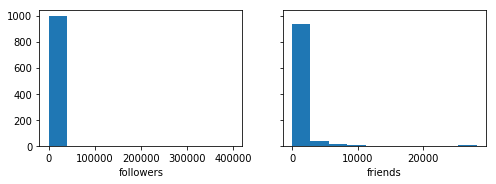

In [288]:
# two side-by-side plots
fig,ax = plt.subplots(1,2,figsize=[8,2.5],sharey=True)
# ax[0] selects the first subplot
# here we use another list comprehension to build a list of followers_count for each user
ax[0].hist([user['followers_count'] for user in tweet_users]);
ax[0].set_xlabel('followers')
# ax[1] selects the second subplot. same list comprehension trick.
ax[1].hist([user['friends_count'] for user in tweet_users]);
ax[1].set_xlabel('friends');

These histograms are not helpful! Let's try logs.

/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


ValueError: range parameter must be finite.

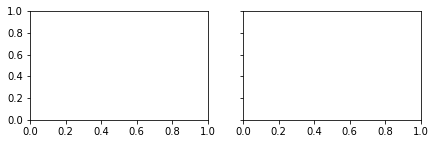

In [56]:
fig,ax = plt.subplots(1,2,figsize=[7,2],sharey=True)
ax[0].hist(np.log([user['followers_count'] for user in tweet_users]));
ax[0].set_xlabel('log followers')
ax[1].hist(np.log([user['friends_count'] for user in tweet_users]));
ax[1].set_xlabel('log friends');

Not a great error message! The issue is that some of these counts are zero, so we can't take a log. 

We'll just do a hacky solution: $\log(n + 1)$

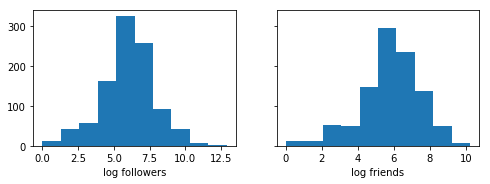

In [289]:
fig,ax = plt.subplots(1,2,figsize=[8,2.5],sharey=True)
ax[0].hist(np.log(1.+np.array([user['followers_count'] for user in tweet_users])));
ax[0].set_xlabel('log followers')
ax[1].hist(np.log(1.+np.array([user['friends_count'] for user in tweet_users])));
ax[1].set_xlabel('log friends');

In [58]:
foll_arr = np.array([user['followers_count'] for user in tweet_users])
friend_arr = np.array([user['friends_count'] for user in tweet_users])

A log-log plot can also be useful for understanding this kind of data.

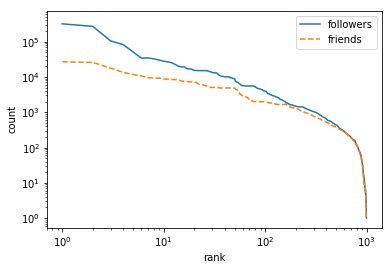

In [290]:
plt.loglog(sorted(foll_arr)[::-1]);
plt.loglog(sorted(friend_arr)[::-1],linestyle='--');
plt.legend(['followers','friends'])
plt.xlabel('rank')
plt.ylabel('count');

## Your turn

The `user.statuses_count` variable is the total number of tweets. Plot the histogram of the log of this variable, and add the variable to the figure above.

Based on your analysis, make a qualitative statement about the difference between the distribution over `statuses_count` and the other two variables.

In [68]:
# your code here

## Your turn (again)

The field `lang` is the language associated with the user account.

- What fraction of tweets are by users for whom the language is English? (the value will be `en`)
- What is the second-most popular language?

In [94]:
# hint!
from collections import Counter
print(Counter(['a','a','a','b','b','c','d']).most_common(2))

[('a', 3), ('b', 2)]


In [84]:
# your code here

# Putting it in a dataframe

In [95]:
import pandas as pd

In [139]:
df = pd.DataFrame({
        # this is a unique id per user
        'id':np.array([user['id'] for user in tweet_users]),
        'followers':np.array([user['followers_count'] for user in tweet_users]),
        'friends':np.array([user['friends_count'] for user in tweet_users])})

In [138]:
df.head(3)

,followers,friends,id
0,802,1303,360002438
1,587,953,57416517
2,251,244,1373051762


Are there any duplicate users in this list? 

We can tell by looking at the id.

In [147]:
print(len(df['id'].unique()),len(df))

861 1000


There are only 861 unique user IDs among these 1000 tweets. 

Let's aggregate by taking the max number of followers and friends for each ID

In [153]:
df_agg = df.groupby('id').aggregate('max')

In [158]:
df_agg.head()

,followers,friends
id,,
3078921,328,0
5678532,723,696
8706922,6166,323
8886812,13117,980
12003092,3979,1036


The `id` has been made the index of this aggregated dataframe.

In [159]:
print(len(df_agg))

861


Any relationship between number of friends and followers?

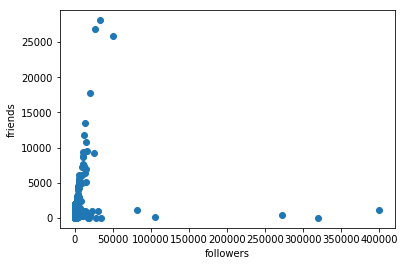

In [160]:
plt.scatter(df_agg['followers'],df_agg['friends']);
plt.xlabel('followers')
plt.ylabel('friends');

Hard to tell. Let's try logs again.

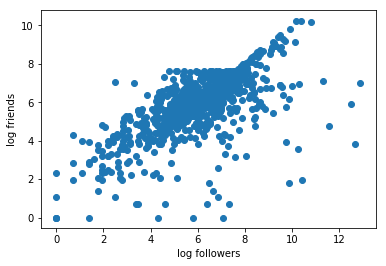

In [161]:
plt.scatter(np.log(1.+df_agg['followers']),
            np.log(1.+df_agg['friends']))
plt.xlabel('log followers')
plt.ylabel('log friends');

Looks like there is some kind of relationship. Let's get a correlation.

In [100]:
import scipy as sp
import scipy.stats as stats

In [162]:
stats.pearsonr(np.log(1.+df_agg['followers']),np.log(1.+df_agg['friends']))

(0.65466624108458016, 1.6901011201515013e-106)

The second number is the $p$-value, which is very small.

Let's confirm that the correlation is equal to $\frac{\text{cov}(x,y)}{\text{std}(x)\times \text{std}(y)}$, as discussed in class.

In [163]:
x = np.log(1. + df_agg['followers'])
y = np.log(1. + df_agg['friends'])

In [164]:
cov_xy = sum((x - x.mean()) * (y - y.mean())) / (len(x)-1)

In [165]:
print(cov_xy,x.std(),y.std())

1.8693869484 1.83175831828 1.5588742648


In [166]:
r_manual = cov_xy / (x.std() * y.std())

In [167]:
print(r_manual)

0.654666241085


Same!

For reference, here's the Spearman rank correlation

In [168]:
stats.spearmanr(np.log(1.+df_agg['followers']),np.log(1.+df_agg['friends']))

SpearmanrResult(correlation=0.67183664842944169, pvalue=4.2597680950819419e-114)

## Your turn

What is the Pearson correlation between the (log) number of `friends` and the (log) `statuses_count`? 

To answer this, add `statuses_count` to the dataframe. You'll need to start over with `df`, and then aggregate again by `id`.

In [116]:
# your code here

# Hypothesis test: English --> more followers

English is the most popular language on Twitter, so perhaps it offers more followers.

Let's do a hypothesis test comparing the number of followers for English-speaking accounts to the number of followers for all other accounts. Specifically, we'll test the hypothesis:

    - H1: The median English-speaking twitter user has more followers than the median non-English-speaking twitter user

In [298]:
# here's a dataframe that includes whether the user's language is English
df = pd.DataFrame({'id':np.array([user['id'] for user in tweet_users]),
                   'followers':np.array([user['followers_count'] for user in tweet_users]),
                   'friends':np.array([user['friends_count'] for user in tweet_users]),
                   'statuses':np.array([user['statuses_count'] for user in tweet_users]),
                   'lang_en':[user['lang']=='en' for user in tweet_users]})

In [299]:
df.head(3)

,followers,friends,id,lang_en,statuses
0,802,1303,360002438,False,44745
1,587,953,57416517,True,44148
2,251,244,1373051762,True,8420


In [300]:
# again, aggregate by id to avoid repetition
df_agg = df.groupby('id').aggregate('max')

In [301]:
df_agg.head(3)

,followers,friends,lang_en,statuses
id,,,,
3078921,328,0,True,40077
5678532,723,696,False,82090
8706922,6166,323,True,40397


In [305]:
# print the medians
# as in lab 1, we use `loc` to select a subset of the dataframe
print(df_agg.loc[df_agg['lang_en']].median())
print(df_agg.loc[~df_agg['lang_en']].median())

followers     417.0
friends       344.0
lang_en         1.0
statuses     8420.0
dtype: float64
followers     399.0
friends       380.0
lang_en         0.0
statuses     9931.5
dtype: float64


The medians are very close, but the English speakers do have a higher median number of followers:

In [308]:
follow_series = df_agg['followers'] # for convenience
h1_val = follow_series[df_agg['lang_en'].values].median() - follow_series[~df_agg['lang_en'].values].median()
print(h1_val)

18.0


Let's do the hypothesis test by randomization. Here's a command to shuffle the series. Execute the cell multiple times to see what happens.

In [322]:
follow_series.sample(frac=1,replace=False).reset_index(drop=True).head()

0    248
1    364
2    333
3    158
4    431
Name: followers, dtype: int64

Now let's compute the difference in medians for a shuffled sample.

In [343]:
samp = follow_series.sample(frac=1,replace=False).reset_index(drop=True)
h0_val = samp[df_agg['lang_en'].values].median() - samp[~df_agg['lang_en'].values].median()
print(h0_val)

-108.5


To get a $p$-value, let's draw 1000 samples like this, and see how many exceed the h1_val

In [267]:
S = 1000

In [273]:
# boring for-loop way
p_count = 0
for _ in range(S):
    samp = follow_series.sample(frac=1,replace=False).reset_index(drop=True)
    h0_val = samp[df_agg['lang_en'].values].median() - samp[~df_agg['lang_en'].values].median()
    p_count += (h0_val > h1_val)
print('p = %f'%(p_count / S))

p = 0.425000


In [376]:
# awesome functional programming way
median_diff = lambda samp : samp[df_agg['lang_en'].values].median() - samp[~df_agg['lang_en'].values].median()
get_samp = lambda : follow_series.sample(frac=1,replace=False).reset_index(drop=True)
h0_vals = [median_diff(get_samp()) for _ in range(S)]
p_count = sum([h0_val > h1_val for h0_val in h0_vals])
print('p = %f'%(p_count / S))

p = 0.397000


Here's a figure that makes the point that the result is not statistically significant.

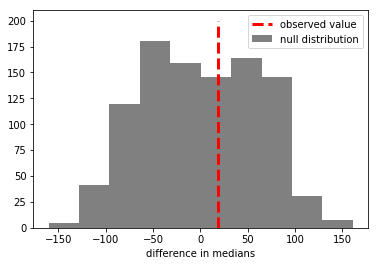

In [377]:
plt.hist(h0_vals,color='gray');
plt.plot([h1_val,h1_val],[0,200],linestyle='--',color='red',linewidth=3)
plt.xlabel('difference in medians');
plt.legend(['observed value','null distribution']);

## You try

Try running the $p$-value function a few times to get a sense for the variance of the estimation of the $p$-value.

Try three different values of $S \in \{100, 1000, 10000\}$. 

The variance of the $p$-value across, say, five runs, should decrease with larger values of $S$.

In [276]:
# your code here

## You try

Above we saw that the median number of statuses for non-English speakers is higher than the number for English speakers. Run the same significance test on this median difference.

In [277]:
# your code here

# Next steps

It looks like this comparison between median number of followers is not statistically significant -- we cannot reject the null hypothesis that the medians between the two groups (english, non-english) are the same.

However, the median number of status messages for the non-English speakers *is* higher. Furthermore, the number of statuses is positively correlated with the number of followers. Perhaps it is still the case that for a given number of statuses, the English-speaking Twitter user might have more followers. How would you compare the number of followers while **controlling** for the number of statuses?

Another direction would be to look at the tweets themselves, and their text. These tweets were gathered during the Ebola crisis, and contain keywords related to the situation. If you'd like to go further and submit this lab for credit, you can also ask me for more tweets like this. 